<a href="https://colab.research.google.com/github/Luke-Chesley/Philly-Crime-Data/blob/main/Philly_Crime_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [166]:
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Importing 2022 data

In [335]:
df = pd.read_csv('https://phl.carto.com/api/v2/sql?filename=incidents_part1_part2&format=csv&q=SELECT%20*%20,%20ST_Y(the_geom)%20AS%20lat,%20ST_X(the_geom)%20AS%20lng%20FROM%20incidents_part1_part2%20WHERE%20dispatch_date_time%20%3E=%20%272022-01-01%27%20AND%20dispatch_date_time%20%3C%20%272023-01-01%27')
df = df.drop(labels=['the_geom','the_geom_webmercator','dc_key','point_x', 'point_y', 'dispatch_date_time', 'cartodb_id', 'psa'], axis=1)
df = df.dropna()

# Homicides by police district

In [337]:
homicide_district_counts = df.loc[df['text_general_code'] == 'Homicide - Criminal']['dc_dist'].value_counts().to_frame().sort_index()

In [338]:
homicide_district_counts_x = [str(x) for x in sorted(homicide_district_counts.index.to_list())]

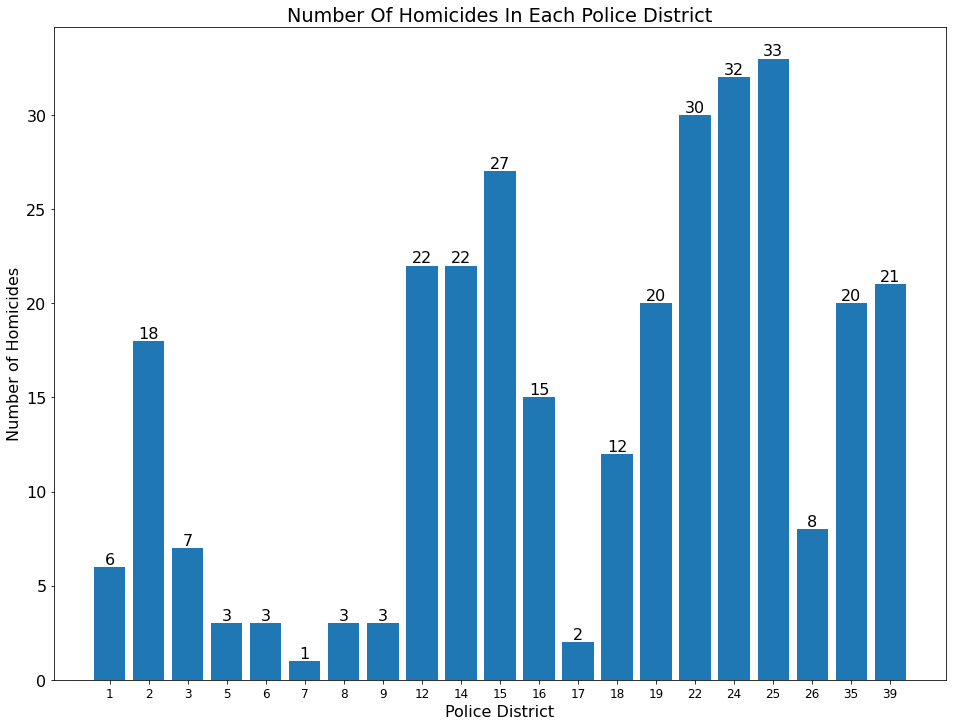

In [339]:
fig, ax = plt.subplots(figsize=(16,12))
plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels



p1 = ax.bar(x = homicide_district_counts_x,
        height = homicide_district_counts['dc_dist'],
        data=homicide_district_counts)

ax.set_ylabel('Number of Homicides')
ax.set_xlabel('Police District')
ax.set_title('Number Of Homicides In Each Police District')

ax.bar_label(p1, label_type='edge')

plt.show()


Map of Philadelphia Police Districts

<img src='https://drive.google.com/uc?id=1m7f3ttFQxpYVGVLkHn8oe3cjAAidSe8W' width = "550" height = "550">

#Homicides by hour

In [ ]:
df = pd.read_csv('https://phl.carto.com/api/v2/sql?filename=incidents_part1_part2&format=csv&q=SELECT%20*%20,%20ST_Y(the_geom)%20AS%20lat,%20ST_X(the_geom)%20AS%20lng%20FROM%20incidents_part1_part2%20WHERE%20dispatch_date_time%20%3E=%20%272022-01-01%27%20AND%20dispatch_date_time%20%3C%20%272023-01-01%27')
df = df.drop(labels=['the_geom','the_geom_webmercator','dc_key','point_x', 'point_y', 'dispatch_date_time', 'cartodb_id', 'psa'], axis=1)
df = df.dropna()

In [ ]:
homicide_hour_counts = df.loc[df['text_general_code'] == 'Homicide - Criminal']['hour_'].value_counts().to_frame().sort_index()

In [ ]:
homicide_hour_counts_x = [str(x) for x in sorted(homicide_hour_counts.index.to_list())]

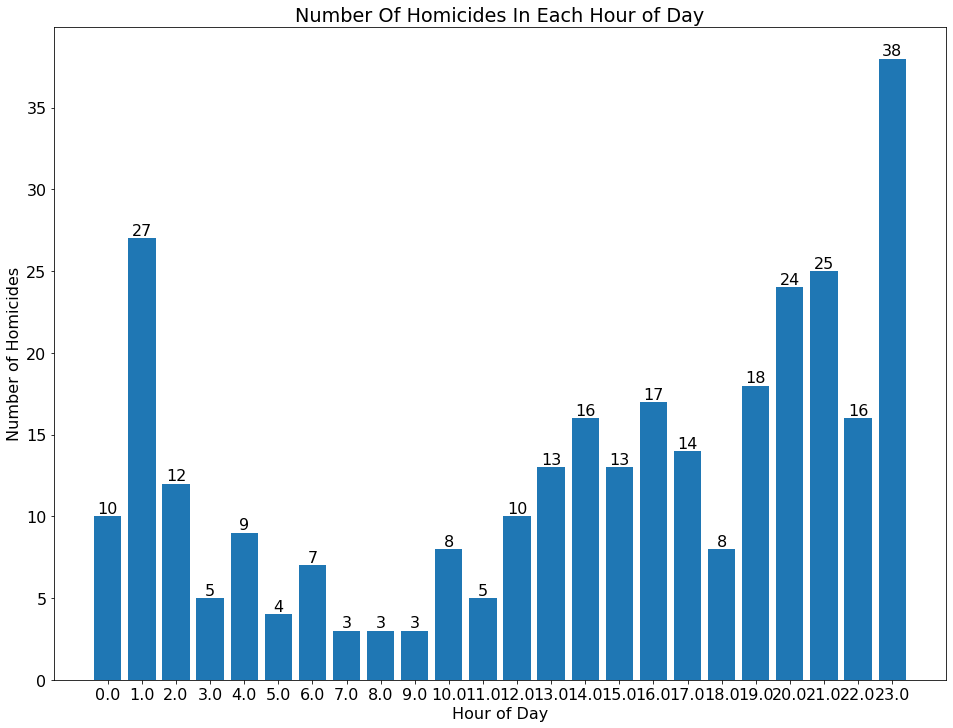

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16) 


p1 = ax.bar(x = homicide_hour_counts_x,
        height = homicide_hour_counts['hour_'],
        data=homicide_hour_counts)

ax.set_ylabel('Number of Homicides')
ax.set_xlabel('Hour of Day')
ax.set_title('Number Of Homicides In Each Hour of Day')

ax.bar_label(p1, label_type='edge')

plt.show()


#Homicides sorted by time and district

In [ ]:
time_dist_df = df.loc[df['text_general_code'] == 'Homicide - Criminal'][['dc_dist', 'hour_']]

In [ ]:
time_dist_df['dc_dist'] = [str(x) for x in sorted(time_dist_df['dc_dist'].to_list())]

Text(0.5, 1.0, 'Homicides by Police District and Hour of Day')

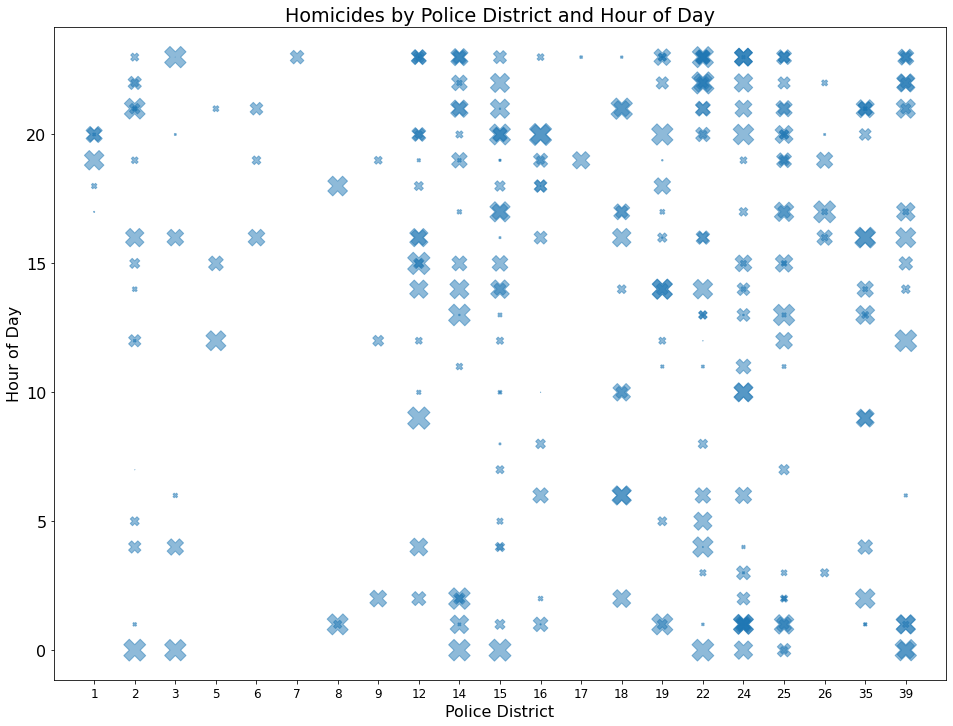

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))


area = (500*np.random.rand(len(time_dist_df))**2)

p1 = ax.scatter(time_dist_df['dc_dist'],
                time_dist_df['hour_'],
                marker='X',
                s=area,
                alpha=0.5)

ax.set_ylabel('Hour of Day')
ax.set_xlabel('Police District')
ax.set_title('Homicides by Police District and Hour of Day')


# Homicides over time

In [ ]:
df = pd.read_csv('https://phl.carto.com/api/v2/sql?filename=incidents_part1_part2&format=csv&q=SELECT%20*%20,%20ST_Y(the_geom)%20AS%20lat,%20ST_X(the_geom)%20AS%20lng%20FROM%20incidents_part1_part2%20WHERE%20dispatch_date_time%20%3E=%20%272022-01-01%27%20AND%20dispatch_date_time%20%3C%20%272023-01-01%27')
df = df.drop(labels=['the_geom','the_geom_webmercator','dc_key','point_x', 'point_y', 'dispatch_date_time', 'cartodb_id', 'psa'], axis=1)
df = df.dropna()

In [ ]:
homicides_over_time = df.loc[df['text_general_code'] == 'Homicide - Criminal']['dispatch_date'].value_counts().to_frame().sort_index()
homicides_over_time['time'] = homicides_over_time.index
homicides_over_time['time'] = pd.to_datetime(homicides_over_time['time'])
homicides_over_time = homicides_over_time.set_index('time')

In [ ]:
month = mdates.MonthLocator()
month_fmt = mdates.DateFormatter('%M')

In [ ]:
lobf = homicides_over_time
lobf['date'] = lobf.index
lobf['day'] =  (pd.to_datetime(lobf['date']) - pd.Timestamp('2022-01-01')).dt.days
lobf.columns = ['homicides','date', 'day']
lobf_X = lobf['day']
lobf_y = lobf['homicides']
theta = np.polyfit(lobf_X, lobf_y.cumsum(), 1)
y_line = theta[1] + (theta[0] * lobf_X)

Text(0.5, 1.0, 'Number of homicides in 2022')

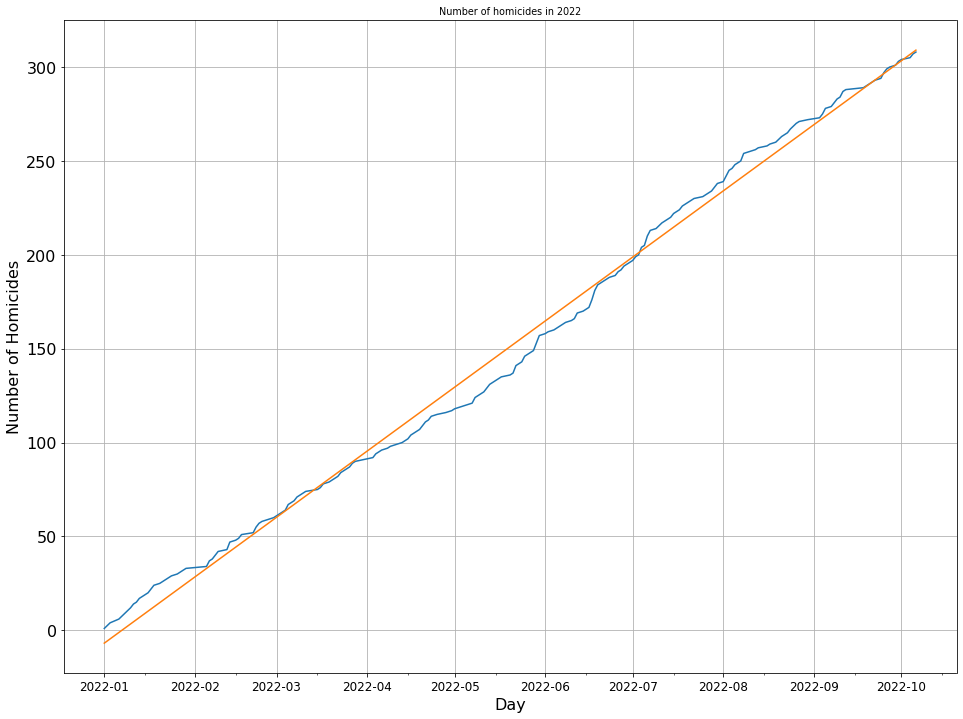

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))

p1 = ax.plot(homicides_over_time.index, homicides_over_time['homicides'].cumsum())


ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,2,3,4,5,6,7,8,9,10,11,12)))
ax.xaxis.set_minor_locator(mdates.DayLocator(bymonthday=(15)))

ax.plot(lobf['date'], y_line)


ax.grid(True)


ax.set_ylabel('Number of Homicides')
ax.set_xlabel('Day')
ax.set_title('Number of homicides in 2022')

Pred of EOY homicides based on data through 10/10



```
theta[1] + (theta[0] * 365) # 10/10/22
407.865
```




# Decision Tree

Get data, drop irrelavant columns

In [ ]:
df = pd.read_csv('https://phl.carto.com/api/v2/sql?filename=incidents_part1_part2&format=csv&q=SELECT%20*%20,%20ST_Y(the_geom)%20AS%20lat,%20ST_X(the_geom)%20AS%20lng%20FROM%20incidents_part1_part2%20WHERE%20dispatch_date_time%20%3E=%20%272022-01-01%27%20AND%20dispatch_date_time%20%3C%20%272023-01-01%27')
df = df.drop(labels=['the_geom','the_geom_webmercator','dc_key','point_x', 'point_y', 'dispatch_date_time', 'cartodb_id', 'psa'], axis=1)
df = df.dropna()

In [ ]:
df = df.drop(labels=['location_block','dispatch_time','objectid','text_general_code'], axis=1)

Format dates into number 0-6



In [ ]:
df['dispatch_date'] = pd.to_datetime(df['dispatch_date'])

In [ ]:
df['dispatch_date'] = df['dispatch_date'].dt.day_of_week

In [ ]:
df

,dc_dist,dispatch_date,hour_,ucr_general,lat,lng
5,24,0,18.0,600,40.002363,-75.111473
6,24,2,13.0,600,40.002363,-75.111473
7,77,1,13.0,600,39.883881,-75.230706
8,77,0,14.0,600,39.883881,-75.230706
9,77,5,14.0,600,39.883881,-75.230706
...,...,...,...,...,...,...
116831,14,5,5.0,1400,40.042681,-75.164833
116832,39,4,16.0,2600,40.027408,-75.176833
116833,24,1,9.0,600,39.996526,-75.113358
116834,5,5,8.0,800,40.041678,-75.225043


In [ ]:
features = ['lat', 'lng', 'dc_dist', 'hour_', 'dispatch_date'] # features to be included in decision tree

In [ ]:
X = df[features] # features
y = df['ucr_general'] # target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
dtree = DecisionTreeClassifier() # create classifier object
dtree = dtree.fit(X_train,y_train) # train classifier

f"Accuracy: {dtree.score(X_test, y_test)}"

'Accuracy: 0.2757660167130919'

In [ ]:
dtree.get_depth()

46

In [ ]:
y_pred = dtree.predict(X_test) # predicted y values

In [ ]:
cm = confusion_matrix(y_test, y_pred)

Text(118.0, 0.5, 'True')

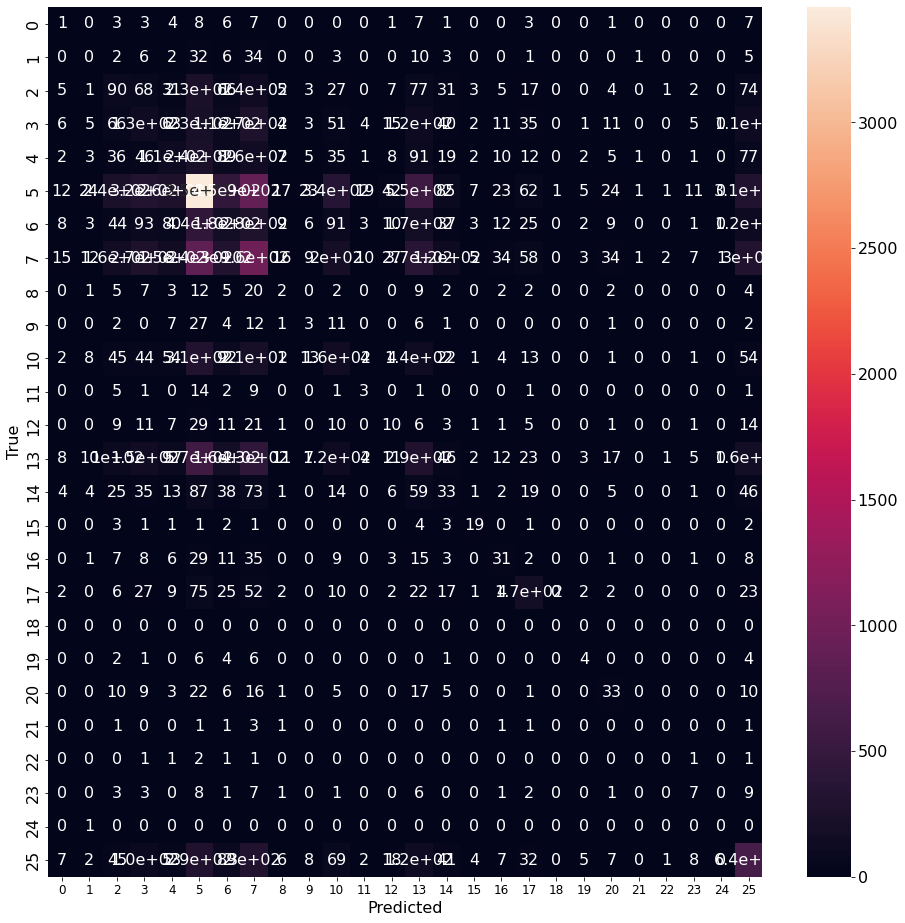

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

# Random Forest Classifier

Get data, drop irrelavant columns

In [ ]:
df = pd.read_csv('https://phl.carto.com/api/v2/sql?filename=incidents_part1_part2&format=csv&q=SELECT%20*%20,%20ST_Y(the_geom)%20AS%20lat,%20ST_X(the_geom)%20AS%20lng%20FROM%20incidents_part1_part2%20WHERE%20dispatch_date_time%20%3E=%20%272022-01-01%27%20AND%20dispatch_date_time%20%3C%20%272023-01-01%27')
df = df.drop(labels=['the_geom','the_geom_webmercator','dc_key','point_x', 'point_y', 'dispatch_date_time', 'cartodb_id', 'psa'], axis=1)
df = df.dropna()

In [ ]:
df = df.drop(labels=['location_block','dispatch_time','objectid','text_general_code'], axis=1)

Format dates into number 0-6


In [ ]:
df['dispatch_date'] = pd.to_datetime(df['dispatch_date'])
df['dispatch_date'] = df['dispatch_date'].dt.day_of_week

In [ ]:
features = ['lat', 'lng', 'dc_dist', 'hour_', 'dispatch_date'] # features to be included in forest

Predict type of crime

In [ ]:
X = df[features] # features
y = df['ucr_general'] # target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
forest = RandomForestClassifier(max_depth=100)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=100)

In [ ]:
f"Accuracy: {forest.score(X_test, y_test)}"

'Accuracy: 0.3395282033426184'

Predict district

In [ ]:
features = ['ucr_general', 'hour_', 'dispatch_date'] # features to be included in forest

In [ ]:
X = df[features] # features
y = df['dc_dist'] # target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
forest = RandomForestClassifier(max_depth=100)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=100)

In [ ]:
f"Accuracy: {forest.score(X_test, y_test)}"

'Accuracy: 0.08809192200557103'

In [ ]:
y_pred = forest.predict(X_test) # predicted y values
cm = confusion_matrix(y_test, y_pred)

Text(118.0, 0.5, 'True')

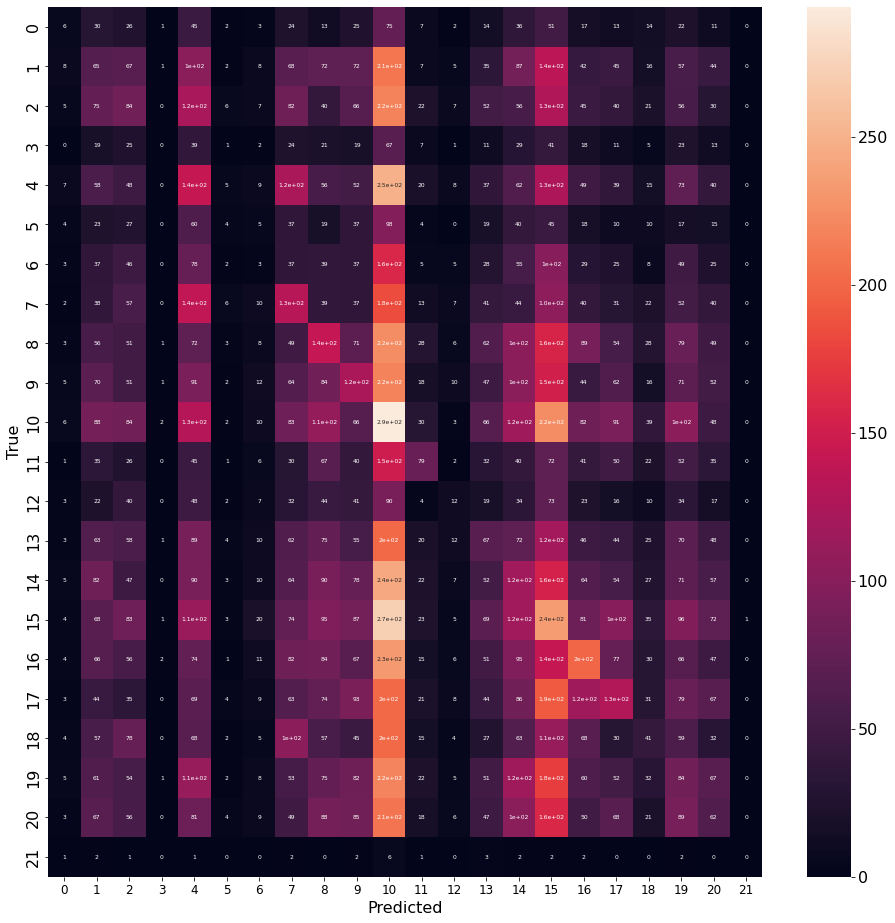

In [ ]:
plt.figure(figsize=(16,16))


sns.heatmap(cm, annot=True)

plt.rc('font', size=8)

plt.xlabel('Predicted')
plt.ylabel('True')

# Data across the years

In [ ]:
df_2022 = pd.read_csv('https://phl.carto.com/api/v2/sql?filename=incidents_part1_part2&format=csv&q=SELECT%20*%20,%20ST_Y(the_geom)%20AS%20lat,%20ST_X(the_geom)%20AS%20lng%20FROM%20incidents_part1_part2%20WHERE%20dispatch_date_time%20%3E=%20%272022-01-01%27%20AND%20dispatch_date_time%20%3C%20%272023-01-01%27')
df_2021 = pd.read_csv('https://phl.carto.com/api/v2/sql?filename=incidents_part1_part2&format=csv&q=SELECT%20*%20,%20ST_Y(the_geom)%20AS%20lat,%20ST_X(the_geom)%20AS%20lng%20FROM%20incidents_part1_part2%20WHERE%20dispatch_date_time%20%3E=%20%272021-01-01%27%20AND%20dispatch_date_time%20%3C%20%272022-01-01%27')
df_2020 = pd.read_csv('https://phl.carto.com/api/v2/sql?filename=incidents_part1_part2&format=csv&q=SELECT%20*%20,%20ST_Y(the_geom)%20AS%20lat,%20ST_X(the_geom)%20AS%20lng%20FROM%20incidents_part1_part2%20WHERE%20dispatch_date_time%20%3E=%20%272020-01-01%27%20AND%20dispatch_date_time%20%3C%20%272021-01-01%27')
df_2019 = pd.read_csv('https://phl.carto.com/api/v2/sql?filename=incidents_part1_part2&format=csv&skipfields=cartodb_id,the_geom,the_geom_webmercator&q=SELECT%20*%20,%20ST_Y(the_geom)%20AS%20lat,%20ST_X(the_geom)%20AS%20lng%20FROM%20incidents_part1_part2%20WHERE%20dispatch_date_time%20%3E=%20%272019-01-01%27%20AND%20dispatch_date_time%20%3C%20%272020-01-01%27')
df_2018 = pd.read_csv('https://phl.carto.com/api/v2/sql?filename=incidents_part1_part2&format=csv&skipfields=cartodb_id,the_geom,the_geom_webmercator&q=SELECT%20*%20,%20ST_Y(the_geom)%20AS%20lat,%20ST_X(the_geom)%20AS%20lng%20FROM%20incidents_part1_part2%20WHERE%20dispatch_date_time%20%3E=%20%272018-01-01%27%20AND%20dispatch_date_time%20%3C%20%272019-01-01%27')
df_2017 = pd.read_csv('https://phl.carto.com/api/v2/sql?filename=incidents_part1_part2&format=csv&skipfields=cartodb_id,the_geom,the_geom_webmercator&q=SELECT%20*%20,%20ST_Y(the_geom)%20AS%20lat,%20ST_X(the_geom)%20AS%20lng%20FROM%20incidents_part1_part2%20WHERE%20dispatch_date_time%20%3E=%20%272017-01-01%27%20AND%20dispatch_date_time%20%3C%20%272018-01-01%27')
df_2016 = pd.read_csv('https://phl.carto.com/api/v2/sql?filename=incidents_part1_part2&format=csv&skipfields=cartodb_id,the_geom,the_geom_webmercator&q=SELECT%20*%20,%20ST_Y(the_geom)%20AS%20lat,%20ST_X(the_geom)%20AS%20lng%20FROM%20incidents_part1_part2%20WHERE%20dispatch_date_time%20%3E=%20%272016-01-01%27%20AND%20dispatch_date_time%20%3C%20%272017-01-01%27')
df_2015 = pd.read_csv('https://phl.carto.com/api/v2/sql?filename=incidents_part1_part2&format=csv&skipfields=cartodb_id,the_geom,the_geom_webmercator&q=SELECT%20*%20,%20ST_Y(the_geom)%20AS%20lat,%20ST_X(the_geom)%20AS%20lng%20FROM%20incidents_part1_part2%20WHERE%20dispatch_date_time%20%3E=%20%272015-01-01%27%20AND%20dispatch_date_time%20%3C%20%272016-01-01%27')
df_2014 = pd.read_csv('https://phl.carto.com/api/v2/sql?filename=incidents_part1_part2&format=csv&skipfields=cartodb_id,the_geom,the_geom_webmercator&q=SELECT%20*%20,%20ST_Y(the_geom)%20AS%20lat,%20ST_X(the_geom)%20AS%20lng%20FROM%20incidents_part1_part2%20WHERE%20dispatch_date_time%20%3E=%20%272014-01-01%27%20AND%20dispatch_date_time%20%3C%20%272015-01-01%27')
df_2013 = pd.read_csv('https://phl.carto.com/api/v2/sql?filename=incidents_part1_part2&format=csv&skipfields=cartodb_id,the_geom,the_geom_webmercator&q=SELECT%20*%20,%20ST_Y(the_geom)%20AS%20lat,%20ST_X(the_geom)%20AS%20lng%20FROM%20incidents_part1_part2%20WHERE%20dispatch_date_time%20%3E=%20%272013-01-01%27%20AND%20dispatch_date_time%20%3C%20%272014-01-01%27')
df_2012 = pd.read_csv('https://phl.carto.com/api/v2/sql?filename=incidents_part1_part2&format=csv&skipfields=cartodb_id,the_geom,the_geom_webmercator&q=SELECT%20*%20,%20ST_Y(the_geom)%20AS%20lat,%20ST_X(the_geom)%20AS%20lng%20FROM%20incidents_part1_part2%20WHERE%20dispatch_date_time%20%3E=%20%272012-01-01%27%20AND%20dispatch_date_time%20%3C%20%272013-01-01%27')
df_2011 = pd.read_csv('https://phl.carto.com/api/v2/sql?filename=incidents_part1_part2&format=csv&skipfields=cartodb_id,the_geom,the_geom_webmercator&q=SELECT%20*%20,%20ST_Y(the_geom)%20AS%20lat,%20ST_X(the_geom)%20AS%20lng%20FROM%20incidents_part1_part2%20WHERE%20dispatch_date_time%20%3E=%20%272011-01-01%27%20AND%20dispatch_date_time%20%3C%20%272012-01-01%27')
df_2010 = pd.read_csv('https://phl.carto.com/api/v2/sql?filename=incidents_part1_part2&format=csv&skipfields=cartodb_id,the_geom,the_geom_webmercator&q=SELECT%20*%20,%20ST_Y(the_geom)%20AS%20lat,%20ST_X(the_geom)%20AS%20lng%20FROM%20incidents_part1_part2%20WHERE%20dispatch_date_time%20%3E=%20%272010-01-01%27%20AND%20dispatch_date_time%20%3C%20%272011-01-01%27')
df_2009 = pd.read_csv('https://phl.carto.com/api/v2/sql?filename=incidents_part1_part2&format=csv&skipfields=cartodb_id,the_geom,the_geom_webmercator&q=SELECT%20*%20,%20ST_Y(the_geom)%20AS%20lat,%20ST_X(the_geom)%20AS%20lng%20FROM%20incidents_part1_part2%20WHERE%20dispatch_date_time%20%3E=%20%272009-01-01%27%20AND%20dispatch_date_time%20%3C%20%272010-01-01%27')
df_2008 = pd.read_csv('https://phl.carto.com/api/v2/sql?filename=incidents_part1_part2&format=csv&skipfields=cartodb_id,the_geom,the_geom_webmercator&q=SELECT%20*%20,%20ST_Y(the_geom)%20AS%20lat,%20ST_X(the_geom)%20AS%20lng%20FROM%20incidents_part1_part2%20WHERE%20dispatch_date_time%20%3E=%20%272008-01-01%27%20AND%20dispatch_date_time%20%3C%20%272009-01-01%27')
df_2007 = pd.read_csv('https://phl.carto.com/api/v2/sql?filename=incidents_part1_part2&format=csv&skipfields=cartodb_id,the_geom,the_geom_webmercator&q=SELECT%20*%20,%20ST_Y(the_geom)%20AS%20lat,%20ST_X(the_geom)%20AS%20lng%20FROM%20incidents_part1_part2%20WHERE%20dispatch_date_time%20%3E=%20%272007-01-01%27%20AND%20dispatch_date_time%20%3C%20%272008-01-01%27')
df_2006 = pd.read_csv('https://phl.carto.com/api/v2/sql?filename=incidents_part1_part2&format=csv&skipfields=cartodb_id,the_geom,the_geom_webmercator&q=SELECT%20*%20,%20ST_Y(the_geom)%20AS%20lat,%20ST_X(the_geom)%20AS%20lng%20FROM%20incidents_part1_part2%20WHERE%20dispatch_date_time%20%3E=%20%272006-01-01%27%20AND%20dispatch_date_time%20%3C%20%272007-01-01%27')

In [306]:
df_list = [df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]

In [323]:
df = pd.concat(df_list)

In [334]:
df.loc[(df['dispatch_date'] < '2007-01-01') & (df['dispatch_date'] > '2005-21-31') & (df['text_general_code'] == 'Homicide - Criminal')]

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng,the_geom,cartodb_id,the_geom_webmercator
209065,214013,19,R,2006-05-14 00:00:00,2006-05-14,00:00:00,3.0,200619036350,5600 BLOCK ARCH STREET,100,Homicide - Criminal,-75.232718,39.962634,39.962634,-75.232718,NaN,NaN,NaN
209066,214014,24,C,2006-05-15 00:00:00,2006-05-15,00:00:00,4.0,200624044453,2900 BLOCK RUTH STREET,100,Homicide - Criminal,-75.119102,39.992704,39.992704,-75.119102,NaN,NaN,NaN
209067,214015,22,I,2006-05-15 00:00:00,2006-05-15,00:00:00,15.0,200622030033,2400 BLOCK N CLEVELAND STREE,100,Homicide - Criminal,-75.162217,39.991676,39.991676,-75.162217,NaN,NaN,NaN
209068,214016,4,J,2006-05-16 00:00:00,2006-05-16,00:00:00,2.0,200604022591,2900 BLOCK S RANDOLPH STREET,100,Homicide - Criminal,-75.157951,39.912406,39.912406,-75.157951,NaN,NaN,NaN
209069,214017,18,C,2006-05-16 00:00:00,2006-05-16,00:00:00,7.0,200618033212,3700 BLOCK SPRUCE STREET,100,Homicide - Criminal,-75.198489,39.951136,39.951136,-75.198489,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215698,214007,1,B,2006-05-10 00:00:00,2006-05-10,00:00:00,11.0,200601016399,2100 BLOCK MCKEAN STREET,100,Homicide - Criminal,-75.180953,39.927104,39.927104,-75.180953,NaN,NaN,NaN
215699,214008,17,F,2006-05-11 00:00:00,2006-05-11,00:00:00,10.0,200617023862,1100 BLOCK S 18TH STREET,100,Homicide - Criminal,-75.173315,39.937796,39.937796,-75.173315,NaN,NaN,NaN
215700,214010,12,I,2006-05-12 00:00:00,2006-05-12,00:00:00,22.0,200612036454,6100 BLOCK PASSYUNK AVENUE,100,Homicide - Criminal,-75.208758,39.918283,39.918283,-75.208758,NaN,NaN,NaN
215701,214011,17,D,2006-05-12 00:00:00,2006-05-12,00:00:00,18.0,200617024116,2200 BLOCK WATKINS STREET,100,Homicide - Criminal,-75.181799,39.930515,39.930515,-75.181799,NaN,NaN,NaN
